# Načtení knihoven a dat

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [39]:
data = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

# Čištění a úprava dat

In [40]:
# Zobrazení základních informacích o datasetu
def display_overview(data):
    print("Přehled datasetu:")
    print(data.info())
    print("\nPrvních 5 řádků datasetu:")
    print(data.head(6))

display_overview(data)

Přehled datasetu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5268 non-null   int64  
 1   Date          5268 non-null   object 
 2   Time          3049 non-null   object 
 3   Location      5248 non-null   object 
 4   Operator      5250 non-null   object 
 5   Flight #      1069 non-null   object 
 6   Route         3561 non-null   object 
 7   Type          5241 non-null   object 
 8   Registration  4933 non-null   object 
 9   cn/In         4040 non-null   object 
 10  Aboard        5246 non-null   float64
 11  Fatalities    5256 non-null   float64
 12  Ground        5246 non-null   float64
 13  Summary       4878 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB
None

Prvních 5 řádků datasetu:
   index        Date   Time                            Location  \
0      0  09/17/1908  1

In [41]:
# Kontrola chybějících dat
def check_missing_values(data):
    print("\nChybějící hodnoty:")
    print(data.isnull().sum())

check_missing_values(data)


Chybějící hodnoty:
index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64


#### Odstranění řádků s velkým množstvím chybějících hodnot

In [49]:
data_cleaned = data.dropna(subset=['Date', 'Aboard', 'Fatalities', 'Ground'])
print(f"\nDataset po odstranění řádků: {data_cleaned.shape[0]} řádků")



Dataset po odstranění řádků: 5236 řádků


#### Nahrazení hodnot v daných sloupcích

In [50]:

data_cleaned.loc[:, 'Flight #'] = data_cleaned['Flight #'].fillna('Unknown')
data_cleaned.loc[:, 'Route'] = data_cleaned['Route'].fillna('Unknown')
data_cleaned.loc[:, 'Registration'] = data_cleaned['Registration'].fillna('Unknown')
data_cleaned.loc[:, 'Time'] = data_cleaned['Type'].fillna('Unknown')
data_cleaned.loc[:, 'Type'] = data_cleaned['Type'].fillna('Unknown')
data_cleaned.loc[:, 'Summary'] = data_cleaned['Summary'].fillna('Unknown')

#### Odstranění sloupce cn/In (není potřebný pro mou analýzu)

In [70]:
if 'cn/In' in data_cleaned.columns:
    data_cleaned = data_cleaned.drop(columns=['cn/In'])

In [71]:
data_cleaned.isnull().sum()

,0
index,0
Date,0
Time,0
Location,19
Operator,18
Flight #,0
Route,0
Type,0
Registration,0
Aboard,0


#### Konvertování sloupce 'Date'

In [72]:
# Konvertovat 'Date' na datetime formát
data_cleaned.loc[:, 'Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# Odebrání řádků, u kterých se nepodařil převod 'Date' na datetime
data_cleaned = data_cleaned.dropna(subset=['Date'])

data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date']) # Convert to datetime

In [73]:
# Vytvoření nových sloupců Rok a Měsíc
data_cleaned['Year'] = data_cleaned['Date'].dt.year
data_cleaned['Month'] = data_cleaned['Date'].dt.month

In [74]:
# Zobrazení prvních řádků pro kontrolu aplikování změn
data_cleaned.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,Aboard,Fatalities,Ground,Summary,Year,Month,Fatality_Rate
0,0,1908-09-17,Wright Flyer III,"Fort Myer, Virginia",Military - U.S. Army,Unknown,Demonstration,Wright Flyer III,Unknown,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9,0.5
1,1,1912-07-12,Dirigible,"AtlantiCity, New Jersey",Military - U.S. Navy,Unknown,Test flight,Dirigible,Unknown,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7,1.0
2,2,1913-08-06,Curtiss seaplane,"Victoria, British Columbia, Canada",Private,-,Unknown,Curtiss seaplane,Unknown,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,8,1.0
3,3,1913-09-09,Zeppelin L-1 (airship),Over the North Sea,Military - German Navy,Unknown,Unknown,Zeppelin L-1 (airship),Unknown,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,9,0.7
4,4,1913-10-17,Zeppelin L-2 (airship),"Near Johannisthal, Germany",Military - German Navy,Unknown,Unknown,Zeppelin L-2 (airship),Unknown,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10,1.0


# Analýza datasetu

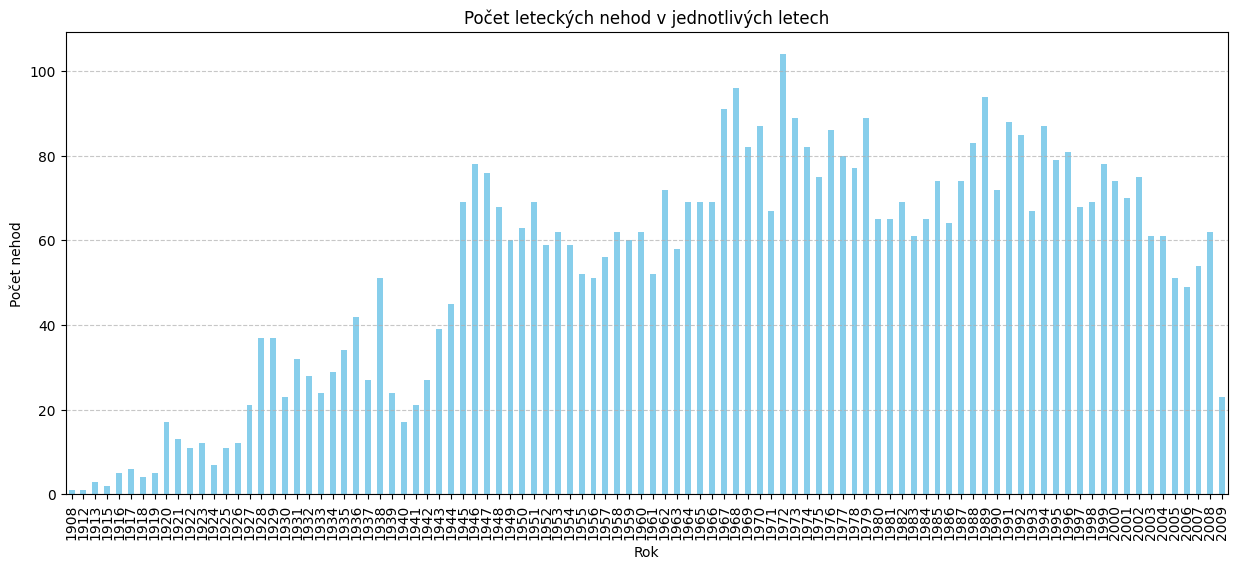

In [57]:
# Graf 1: Počet leteckých nehod v jednolivých letech
def plot_crashes_per_year(data):
    plt.figure(figsize=(15, 6))
    data['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title('Počet leteckých nehod v jednotlivých letech')
    plt.xlabel('Rok')
    plt.ylabel('Počet nehod')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_crashes_per_year(data_cleaned)

In [58]:
# Vytvoření nového sloupce 'Fatality_rate
data_cleaned['Fatality_Rate'] = data_cleaned['Fatalities'] / data_cleaned['Aboard']
data_cleaned['Fatality_Rate'] = data_cleaned['Fatality_Rate'].fillna(0)

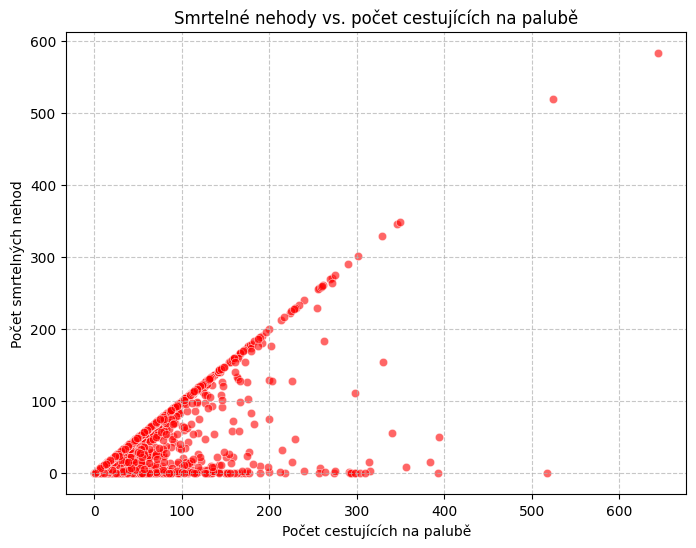

In [59]:
# Graf 2: Smrtelné nehody vs. počet cestujících na palubě
def plot_fatalities_vs_aboard(data):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Aboard', y='Fatalities', data=data, alpha=0.6, color='red')
    plt.title('Smrtelné nehody vs. počet cestujících na palubě')
    plt.xlabel('Počet cestujících na palubě')
    plt.ylabel('Počet smrtelných nehod')
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()

plot_fatalities_vs_aboard(data_cleaned)


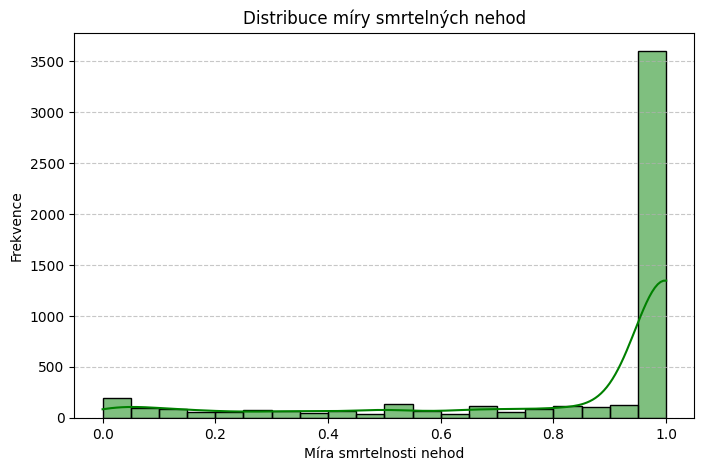

In [60]:
# Graf 3: Distribuce míry smrtelných nehod
def plot_fatality_rate_distribution(data):
    plt.figure(figsize=(8, 5))
    sns.histplot(data['Fatality_Rate'], kde=True, bins=20, color='green')
    plt.title('Distribuce míry smrtelných nehod')
    plt.xlabel('Míra smrtelnosti nehod')
    plt.ylabel('Frekvence')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_fatality_rate_distribution(data_cleaned)

In [61]:
# Top 10 operátorů s nejvíce nehodami
def top_operators(data):
    operator_crash_counts = data['Operator'].value_counts().head(10)
    print("\nTop 10 operátorů s nejvíce nehodami:")
    print(operator_crash_counts)
    return operator_crash_counts

operator_crash_counts = top_operators(data_cleaned)


Top 10 operátorů s nejvíce nehodami:
Operator
Aeroflot                               179
Military - U.S. Air Force              174
Air France                              67
Deutsche Lufthansa                      65
Air Taxi                                44
United Air Lines                        43
Military - U.S. Army Air Forces         43
Pan American World Airways              40
Military - Royal Air Force              36
China National Aviation Corporation     36
Name: count, dtype: int64


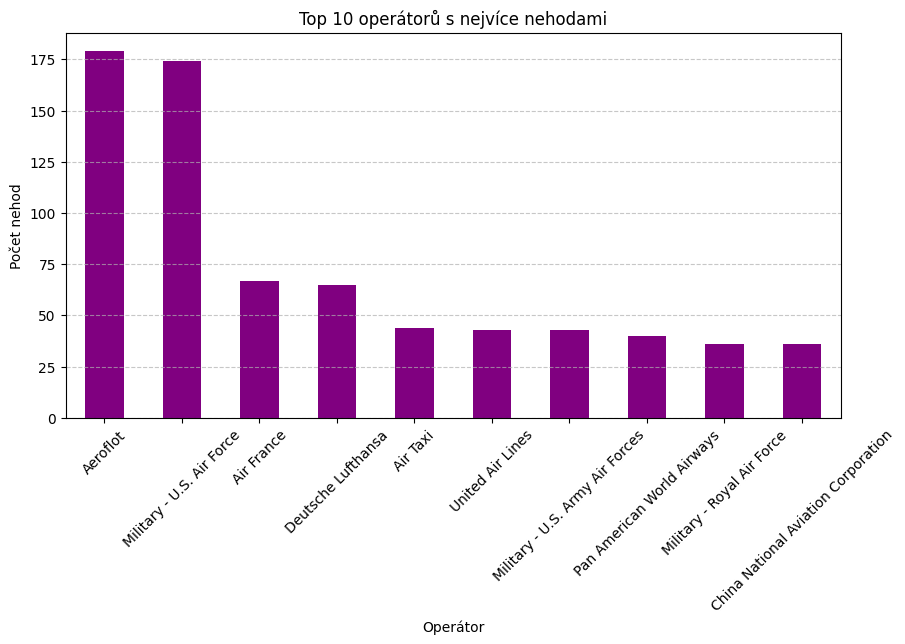

In [62]:
# Graf 4: Top 10 operátorů s nejvíce nehodami
def plot_top_operators(operator_crash_counts):
    plt.figure(figsize=(10, 5))
    operator_crash_counts.plot(kind='bar', color='purple')
    plt.title('Top 10 operátorů s nejvíce nehodami')
    plt.xlabel('Operátor')
    plt.ylabel('Počet nehod')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_top_operators(operator_crash_counts)

In [63]:
# Počet leteckých nehod v jednotlivých měsících
def crashes_per_month(data):
    monthly_counts = {}
    for month in range(1, 13):
        monthly_counts[month] = data[data['Month'] == month].shape[0]
    return monthly_counts

monthly_crashes = crashes_per_month(data_cleaned)

print("\nPočet leteckých nehod v jednotlivých měsícíh:")
for month, count in monthly_crashes.items():
    print(f"Měsíc {month}: {count} nehod")


Počet leteckých nehod v jednotlivých měsícíh:
Měsíc 1: 494 nehod
Měsíc 2: 393 nehod
Měsíc 3: 450 nehod
Měsíc 4: 377 nehod
Měsíc 5: 368 nehod
Měsíc 6: 384 nehod
Měsíc 7: 427 nehod
Měsíc 8: 472 nehod
Měsíc 9: 457 nehod
Měsíc 10: 452 nehod
Měsíc 11: 449 nehod
Měsíc 12: 513 nehod


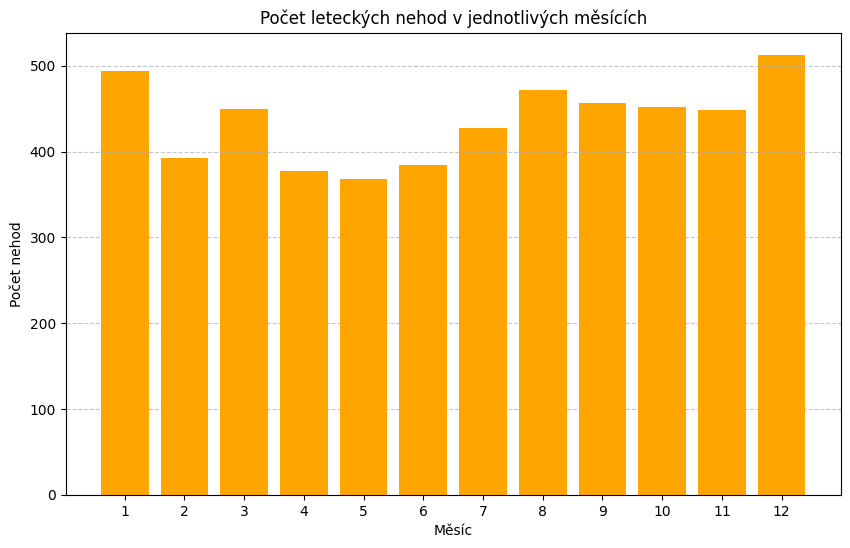

In [64]:
# Graf 5: Počet leteckých nehod v jednotlivých měsících
def plot_crashes_per_month(monthly_crashes):
    plt.figure(figsize=(10, 6))
    plt.bar(monthly_crashes.keys(), monthly_crashes.values(), color='orange')
    plt.title('Počet leteckých nehod v jednotlivých měsících')
    plt.xlabel('Měsíc')
    plt.ylabel('Počet nehod')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(range(1, 13))
    plt.show()

plot_crashes_per_month(monthly_crashes)

# Ekonometrická analýza

#### Zobrazení základních statistických charakteristik

In [65]:
def statistical_summary(data):
    print("\nZákladní statistické charakteristiky:")
    print(data[['Aboard', 'Fatalities', 'Fatality_Rate']].describe())

statistical_summary(data_cleaned)


Základní statistické charakteristiky:
            Aboard   Fatalities  Fatality_Rate
count  5236.000000  5236.000000    5236.000000
mean     27.589190    20.104851       0.834404
std      43.109636    33.238341       0.299317
min       0.000000     0.000000       0.000000
25%       5.000000     3.000000       0.800000
50%      13.000000     9.000000       1.000000
75%      30.000000    23.000000       1.000000
max     644.000000   583.000000       1.000000


#### Regresní analýza OLS

In [66]:
# Analýza vztahu mezi počtem úmrtí a počtem posažérů na palubě
X = data_cleaned[['Aboard']]
y = data_cleaned['Fatalities']
model = sm.OLS(y, X).fit()

def ols_summary(model):
    print("\nVýsledky OLS regrese:")
    print(model.summary())

ols_summary(model)


Výsledky OLS regrese:
                                 OLS Regression Results                                
Dep. Variable:             Fatalities   R-squared (uncentered):                   0.680
Model:                            OLS   Adj. R-squared (uncentered):              0.680
Method:                 Least Squares   F-statistic:                          1.113e+04
Date:                Wed, 15 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:38:30   Log-Likelihood:                         -23608.
No. Observations:                5236   AIC:                                  4.722e+04
Df Residuals:                    5235   BIC:                                  4.722e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

#### Korelační analzýa

In [67]:
def correlation_analysis(data):
    correlation_matrix = data[['Aboard', 'Fatalities', 'Fatality_Rate']].corr()
    print("\nKorelační matice:")
    print(correlation_matrix)
    return correlation_matrix

correlation_matrix = correlation_analysis(data_cleaned)


Korelační matice:
                 Aboard  Fatalities  Fatality_Rate
Aboard         1.000000    0.757101      -0.226003
Fatalities     0.757101    1.000000       0.186892
Fatality_Rate -0.226003    0.186892       1.000000


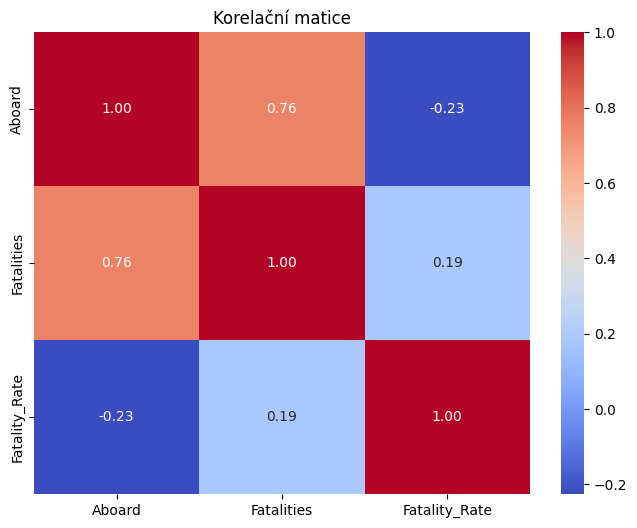

In [68]:
# Graf 6: Korelační matice - heatmap
def plot_correlation_heatmap(correlation_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Korelační matice')
    plt.show()

plot_correlation_heatmap(correlation_matrix)

# Uložení datasetu

In [69]:
data_cleaned.to_csv('dataset_cleaned.csv', index=False)
print("Uloženo.")

Uloženo.
